11493376/11490434 [==============================] - 3s 0us/step


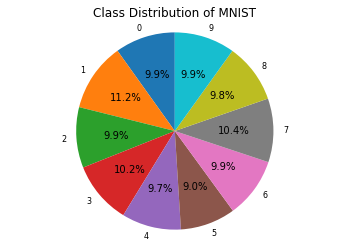

<Figure size 432x288 with 0 Axes>

In [1]:
import tensorflow as tf
import warnings
warnings.filter(action='ignore')
import numpy as np

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# print(x_train[0])
train_dist = np.bincount(y_train)
labels = [i for i in range(10)]
# test_dist = np.bincount(y_test)*100.0/np.sum(y_test) almost the same with training
# print(x_train.shape)
# print(y_train[0])     5
fig1, ax1 = plt.subplots()
plt.title('Class Distribution of MNIST')
patches, texts, autotexts = ax1.pie(train_dist, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
[_.set_fontsize(8) for _ in texts]
plt.show()
plt.clf()

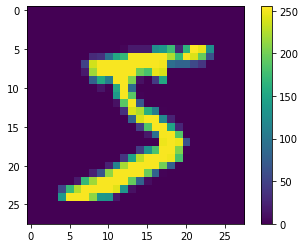

In [2]:
plt.imshow(x_train[0])
plt.colorbar()
# plt.clf()

In [3]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))

In [5]:
X_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [6]:
X_train, X_test = X_train/255.0, X_test/255.0 # normalize image

from MLP import MLPClassifier

The highest score of this model(no hidden layer & No L2) is: 92.78%, No.18 epoch


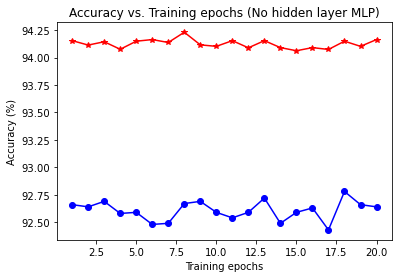

[92.66, 92.64, 92.69, 92.58, 92.58999999999999, 92.47999999999999, 92.49000000000001, 92.67, 92.69, 92.58999999999999, 92.54, 92.58999999999999, 92.72, 92.49000000000001, 92.58999999999999, 92.63, 92.43, 92.78, 92.66, 92.64]
[94.15333333333334, 94.11333333333334, 94.14333333333333, 94.075, 94.14833333333334, 94.16333333333333, 94.13666666666667, 94.23, 94.11500000000001, 94.10166666666666, 94.15333333333334, 94.08833333333332, 94.15333333333334, 94.08999999999999, 94.06166666666667, 94.08999999999999, 94.07333333333334, 94.14833333333334, 94.10166666666666, 94.16333333333333]


In [7]:
# print(X_train.shape) (60000, 784)

clf = MLPClassifier(hidden_layer_sizes=(), alpha=0, max_iter=400)
acc_list_1 = []
acc_list_1_train = []
for epoch in range(20):
    clf.fit(X_train, y_train)
    acc_list_1.append(clf.score(X_test, y_test)*100.0)
    acc_list_1_train.append(clf.score(X_train, y_train)*100.0)
print(f'The highest score of this model(no hidden layer & No L2) is: {np.max(acc_list_1)}%, No.{np.argmax(acc_list_1)+1} epoch')
plt.plot([i+1 for i in range(20)], acc_list_1, marker='o', color='blue', label='testing accuracy')
plt.plot([i+1 for i in range(20)], acc_list_1_train, marker='*', color='red', label='training accuracy')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (No hidden layer MLP)')
plt.legend()
plt.show()
print(acc_list_1)
print(acc_list_1_train)

In [8]:
acc_list_1 = [92.66, 92.64, 92.69, 92.58, 92.58999999999999, 92.47999999999999, 92.49000000000001, 92.67, 92.69, 92.58999999999999, 92.54, 92.58999999999999, 92.72, 92.49000000000001, 92.58999999999999, 92.63, 92.43, 92.78, 92.66, 92.64]
acc_list_1_train = [94.15333333333334, 94.11333333333334, 94.14333333333333, 94.075, 94.14833333333334, 94.16333333333333, 94.13666666666667, 94.23, 94.11500000000001, 94.10166666666666, 94.15333333333334, 94.08833333333332, 94.15333333333334, 94.08999999999999, 94.06166666666667, 94.08999999999999, 94.07333333333334, 94.14833333333334, 94.10166666666666, 94.16333333333333]

In [9]:
plt.clf()

<Figure size 432x288 with 0 Axes>

The highest score of this model(1 hidden layer & No L2) is: 71.61%, No.10 epoch


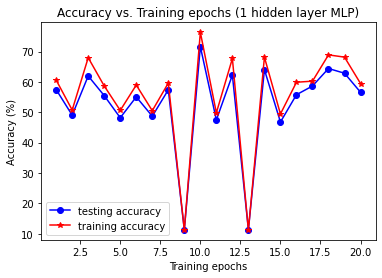

[57.46, 49.02, 61.94, 55.47, 48.18, 55.05, 48.69, 57.379999999999995, 11.35, 71.61, 47.48, 62.239999999999995, 11.35, 64.03999999999999, 46.77, 55.769999999999996, 58.64, 64.4, 62.849999999999994, 56.58]
[60.59166666666667, 50.72666666666667, 67.96166666666666, 58.65833333333333, 50.60333333333333, 58.96, 50.50333333333333, 59.611666666666665, 11.236666666666666, 76.34666666666666, 49.803333333333335, 67.69833333333334, 11.236666666666666, 68.13666666666667, 49.42666666666667, 59.87833333333333, 60.23333333333334, 68.88833333333334, 68.15333333333334, 59.461666666666666]


In [10]:
clf = MLPClassifier(hidden_layer_sizes=(128, 1), alpha=0, max_iter=400)
acc_list_2 = []
acc_list_2_train = []
for epoch in range(20):
    clf.fit(X_train, y_train)
    acc_list_2.append(clf.score(X_test, y_test)*100.0)
    acc_list_2_train.append(clf.score(X_train, y_train)*100.0)
print(f'The highest score of this model(1 hidden layer & No L2) is: {np.max(acc_list_2)}%, No.{np.argmax(acc_list_2)+1} epoch')
plt.plot([i+1 for i in range(20)], acc_list_2, marker='o', color='blue', label='testing accuracy')
plt.plot([i+1 for i in range(20)], acc_list_2_train, marker='*', color='red', label='training accuracy')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (1 hidden layer MLP)')
plt.legend()
plt.show()
print(acc_list_2)
print(acc_list_2_train)

In [11]:
plt.clf()

<Figure size 432x288 with 0 Axes>

The highest score of this model(2 hidden layer & No L2) is: 94.74000000000001%, No.13 epoch


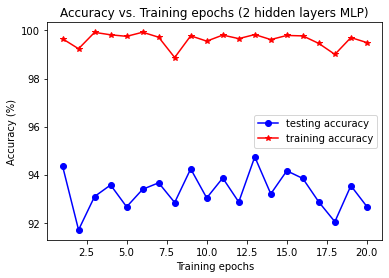

[94.36, 91.7, 93.08999999999999, 93.57, 92.66, 93.39, 93.66, 92.84, 94.24, 93.03, 93.86, 92.86, 94.74000000000001, 93.2, 94.16, 93.84, 92.86, 92.04, 93.54, 92.67]
[99.65333333333334, 99.23833333333333, 99.92, 99.81833333333333, 99.75500000000001, 99.925, 99.71833333333333, 98.87333333333333, 99.77666666666667, 99.555, 99.80666666666667, 99.66000000000001, 99.82833333333333, 99.62, 99.79166666666667, 99.77333333333334, 99.45833333333334, 99.00333333333333, 99.70333333333333, 99.495]


In [12]:
clf = MLPClassifier(hidden_layer_sizes=(128, 2), alpha=0, max_iter=400)
acc_list_3 = []
acc_list_3_train = []
for epoch in range(20):
    clf.fit(X_train, y_train)
    acc_list_3.append(clf.score(X_test, y_test)*100.0)
    acc_list_3_train.append(clf.score(X_train, y_train)*100.0)
print(f'The highest score of this model(2 hidden layer & No L2) is: {np.max(acc_list_3)}%, No.{np.argmax(acc_list_3)+1} epoch')
plt.plot([i+1 for i in range(20)], acc_list_3, marker='o', color='blue', label='testing accuracy')
plt.plot([i+1 for i in range(20)], acc_list_3_train, marker='*', color='red', label='training accuracy')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (2 hidden layers MLP)')
plt.legend()
plt.show()
print(acc_list_3)
print(acc_list_3_train)

In [13]:
plt.clf()

<Figure size 432x288 with 0 Axes>

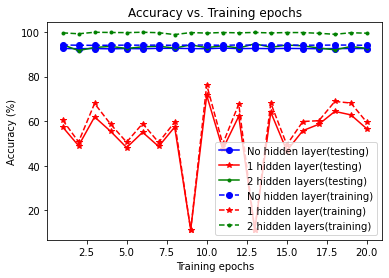

In [14]:
plt.plot([i+1 for i in range(20)], acc_list_1, marker='o', color='blue', label='No hidden layer(testing)')
plt.plot([i+1 for i in range(20)], acc_list_2, marker='*', color='red', label='1 hidden layer(testing)')
plt.plot([i+1 for i in range(20)], acc_list_3, marker='.', color='green', label='2 hidden layers(testing)')
plt.plot([i+1 for i in range(20)], acc_list_1_train, marker='o', color='blue', label='No hidden layer(training)', linestyle='dashed')
plt.plot([i+1 for i in range(20)], acc_list_2_train, marker='*', color='red', label='1 hidden layer(training)', linestyle='dashed')
plt.plot([i+1 for i in range(20)], acc_list_3_train, marker='.', color='green', label='2 hidden layers(training)', linestyle='dashed')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs')
plt.legend()
plt.show()

In [15]:
plt.clf()

<Figure size 432x288 with 0 Axes>

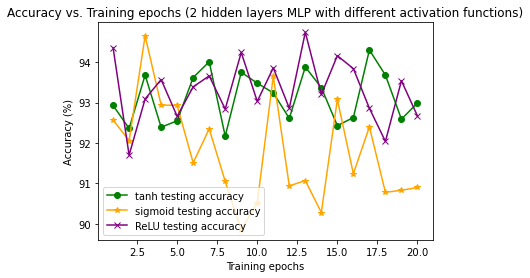

The highest score of the model(using tanh) is: 94.3%, No. 17 epoch.
The highest score of the model(using sigmoid) is: 94.65%, No. 3 epoch.
[92.93, 92.36, 93.67999999999999, 92.39, 92.55, 93.62, 94.01, 92.17, 93.75, 93.47999999999999, 93.24, 92.61, 93.88, 93.37, 92.43, 92.63, 94.3, 93.67999999999999, 92.58999999999999, 92.99]
[99.94, 99.35833333333333, 99.97333333333333, 99.99666666666667, 99.99666666666667, 99.92166666666667, 99.99833333333333, 99.97, 99.99, 99.995, 99.98333333333333, 99.995, 99.98833333333333, 99.92999999999999, 99.99166666666667, 99.99833333333333, 99.99666666666667, 99.99333333333334, 99.90333333333334, 99.71333333333334]
[92.57, 92.06, 94.65, 92.94, 92.93, 91.51, 92.35, 91.05, 89.85, 90.52, 93.65, 90.94, 91.07, 90.28, 93.08, 91.24, 92.4, 90.78, 90.83, 90.9]
[99.94666666666666, 99.96333333333334, 99.95833333333334, 99.98, 99.94166666666666, 99.97, 99.98, 99.97666666666667, 99.99, 99.96833333333333, 99.94666666666666, 99.96000000000001, 99.98166666666667, 99.97833333

In [16]:
clf_tanh = MLPClassifier(hidden_layer_sizes=(128, 2), alpha=0, activation="tanh", max_iter=400)
clf_sig = MLPClassifier(hidden_layer_sizes=(128, 2), alpha=0, activation="logistic", max_iter=400)
acc_list_tanh = []
acc_list_sig = []
acc_list_tanh_train = []
acc_list_sig_train = []
for epoch in range(20):
    clf_tanh.fit(X_train, y_train)
    clf_sig.fit(X_train, y_train)
    acc_list_tanh.append(clf_tanh.score(X_test, y_test)*100.0)
    acc_list_sig.append(clf_sig.score(X_test, y_test)*100.0)
    acc_list_tanh_train.append(clf_tanh.score(X_train, y_train)*100.0)
    acc_list_sig_train.append(clf_sig.score(X_train, y_train)*100.0)
plt.plot([i+1 for i in range(20)], acc_list_tanh, marker='o', color='green', label='tanh testing accuracy')
plt.plot([i+1 for i in range(20)], acc_list_sig, marker='*', color='orange', label='sigmoid testing accuracy')
plt.plot([i+1 for i in range(20)], acc_list_3, marker='x', color='purple', label='ReLU testing accuracy')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (2 hidden layers MLP with different activation functions)')
plt.legend()
plt.show()
print(f'The highest score of the model(using tanh) is: {np.max(acc_list_tanh)}%, No. {np.argmax(acc_list_tanh)+1} epoch.')
print(f'The highest score of the model(using sigmoid) is: {np.max(acc_list_sig)}%, No. {np.argmax(acc_list_sig)+1} epoch.')
print(acc_list_tanh)
print(acc_list_tanh_train)
print(acc_list_sig)
print(acc_list_sig_train)

In [17]:
plt.clf()

<Figure size 432x288 with 0 Axes>

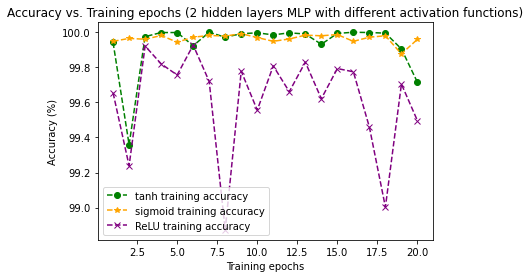

In [18]:
plt.plot([i+1 for i in range(20)], acc_list_tanh_train, marker='o', color='green', label='tanh training accuracy', linestyle='dashed')
plt.plot([i+1 for i in range(20)], acc_list_sig_train, marker='*', color='orange', label='sigmoid training accuracy', linestyle='dashed')
plt.plot([i+1 for i in range(20)], acc_list_3_train, marker='x', color='purple', label='ReLU training accuracy', linestyle='dashed')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (2 hidden layers MLP with different activation functions)')
plt.legend()
plt.show()

In [19]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [22]:
a = 0.0001
import math
acc_list_L2_best = []
acc_list_L2_train_best = []
alpha_list_log10 = [] # list of log10(alpha)
acc_alpha = []
best_alpha = None
best = 0
for i in range(9):
    acc_list_L2 = []
    acc_list_L2_train = []
    alpha = a * math.pow(10.0, i)
    clf_L2 = MLPClassifier(hidden_layer_sizes=(128, 2), alpha=alpha, max_iter=400) # default act_func is ReLU
    for epoch in range(20):
        clf_L2.fit(X_train, y_train)
        acc_list_L2.append(clf_L2.score(X_test, y_test)*100.0)
        acc_list_L2_train.append(clf_L2.score(X_train, y_train)*100.0)
    alpha_list_log10.append(math.log10(clf_L2.alpha))
    best_this_iter = np.max(acc_list_L2)
    acc_alpha.append(best_this_iter)
    if best < best_this_iter:
        best = best_this_iter
        acc_list_L2_best = acc_list_L2
        acc_list_L2_train_best = acc_list_L2_train
        best_alpha = clf_L2.alpha
print(acc_list_L2_best)
print(acc_list_L2_train_best)
print(acc_alpha)
print(alpha_list_log10)
print(best_alpha)
print(best)

[94.65, 94.53, 93.66, 94.26, 93.83, 93.84, 93.8, 93.75, 94.83, 94.07, 93.96, 92.91, 93.94, 92.78, 94.02000000000001, 93.26, 93.66, 94.19999999999999, 95.0, 94.23]
[99.01166666666667, 98.925, 98.855, 98.82833333333333, 98.69333333333333, 98.60666666666667, 98.84166666666667, 98.75333333333333, 99.14500000000001, 98.67333333333333, 99.09, 98.26666666666667, 98.54666666666667, 98.34833333333334, 99.0, 98.53833333333334, 98.30499999999999, 98.58166666666666, 98.66833333333334, 98.56833333333334]
[94.06, 94.28, 94.25, 95.0, 92.74, 71.76, 11.35, 11.35, 11.35]
[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
0.1
95.0


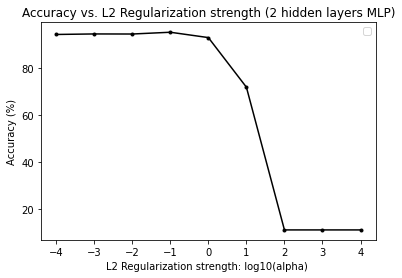

In [23]:
plt.plot(alpha_list_log10, acc_alpha, marker='.', color='black')
plt.xlabel('L2 Regularization strength: log10(alpha) ')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. L2 Regularization strength (2 hidden layers MLP)')
plt.legend()
plt.show()

In [24]:
plt.clf()

<Figure size 432x288 with 0 Axes>

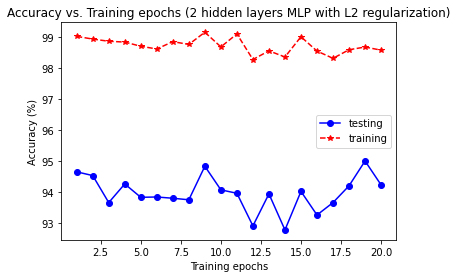

In [25]:
plt.plot([i+1 for i in range(20)], acc_list_L2_best, marker='o', color='blue', label='testing')
plt.plot([i+1 for i in range(20)], acc_list_L2_train_best, marker='*', color='red', label='training', linestyle='dashed')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (2 hidden layers MLP with L2 regularization)')
plt.legend()
plt.show()

In [26]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [27]:
X_train, X_test = X_train*255.0, X_test*255.0 # undo normalized image

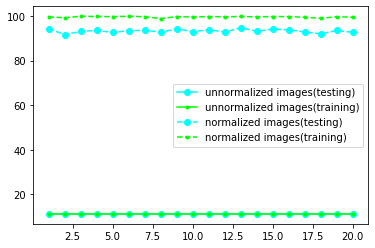

[11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35, 11.35]
[11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666, 11.236666666666666]
The highest score of this model(2 hidden layers & unnormalized) is: 11.35%, No. 1 epoch
The highest score of this model(2 hidden layers & normalized) is: 94.74000000000001%, No. 13 epoch


In [28]:
clf = MLPClassifier(hidden_layer_sizes=(128, 2), alpha=0, max_iter=400) # No L2 regularization
acc_list_unnorm = []
acc_list_unnorm_train = []
for epoch in range(20):
    clf.fit(X_train, y_train)
    acc_list_unnorm.append(clf.score(X_test, y_test)*100.0)
    acc_list_unnorm_train.append(clf.score(X_train, y_train)*100.0)
plt.plot([i+1 for i in range(20)], acc_list_unnorm, marker='o', color='cyan', label='unnormalized images(testing)')
plt.plot([i+1 for i in range(20)], acc_list_unnorm_train, marker='.', color='lime', label='unnormalized images(training)')
plt.plot([i+1 for i in range(20)], acc_list_3, marker='o', color='cyan', label='normalized images(testing)', linestyle='dashed')
plt.plot([i+1 for i in range(20)], acc_list_3_train, marker='.', color='lime', label='normalized images(training)', linestyle='dashed')
plt.legend()
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (normalized vs. unnormalized)')
plt.show()
print(acc_list_unnorm)
print(acc_list_unnorm_train)
print(f'The highest score of this model(2 hidden layers & unnormalized) is: {np.max(acc_list_unnorm)}%, No. {np.argmax(acc_list_unnorm)+1} epoch')
print(f'The highest score of this model(2 hidden layers & normalized) is: {np.max(acc_list_3)}%, No. {np.argmax(acc_list_3)+1} epoch')

In [29]:
plt.clf()

<Figure size 432x288 with 0 Axes>

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
X_train, X_test = X_train/255.0, X_test/255.0 # normalize again

In [38]:
acc_list_KNN = []
acc_list_KNN_train = []
for i in [1, 10, 20]:
    K = i
    KNN = KNeighborsClassifier(n_neighbors=K)
    KNN.fit(X_train, y_train)
    acc_list_KNN.append(KNN.score(X_test, y_test)*100.0)
    acc_list_KNN_train.append(KNN.score(X_train, y_train)*100.0)

print(f'the highest accuracy of KNN Classifier is: {np.max(acc_list_KNN)}% ')
print(acc_list_KNN)
print(acc_list_KNN_train)

the highest accuracy of KNN Classifier is: 96.91% 
[96.91, 96.65, 96.25]
[100.0, 97.5, 96.73833333333334]


In [ ]:
plt.clf()

In [33]:
acc_list_width_best = []
acc_list_width_train_best = []
acc_width = []
acc_width_train = []
best_acc = 0
best_width = 0
for i in range(1, 8):
    acc_list_width = []
    acc_list_width_train = []
    clf_width = MLPClassifier(hidden_layer_sizes=(100*i, 2), alpha=0.1, max_iter=300)
    for epoch in range(20):
        clf_width.fit(X_train, y_train)
        acc_list_width.append(clf_width.score(X_test, y_test)*100.0)
        acc_list_width_train.append(clf_width.score(X_train, y_train)*100.0)
    best_this = np.max(acc_list_width)
    best_train = acc_list_width_train[np.argmax(acc_list_width)]
    acc_width.append(best_this)
    acc_width_train.append(best_train)
    if best_acc < best_this:
        best_acc = best_this
        acc_list_width_best = acc_list_width
        acc_list_width_train_best = acc_list_width_train
        best_width = clf_width.hidden_layer_sizes[0]
print(best_acc)
print(best_width)
print(acc_list_width_best)
print(acc_list_width_train_best)
print(acc_width)
print(acc_width_train)

95.7
700
[95.7, 94.25, 94.37, 69.92, 94.05, 94.42, 94.45, 94.59, 94.5, 94.02000000000001, 95.06, 94.71000000000001, 94.14, 11.35, 94.07, 94.71000000000001, 94.84, 95.05, 94.08999999999999, 94.64]
[99.075, 99.02499999999999, 98.965, 74.96833333333333, 98.83833333333332, 98.86666666666667, 98.72166666666666, 98.715, 98.88166666666666, 98.81333333333333, 99.0, 99.10333333333334, 98.63666666666666, 11.236666666666666, 98.88833333333334, 99.14833333333334, 98.91333333333333, 99.20666666666666, 98.64166666666667, 98.79]
[94.62, 95.32000000000001, 95.33, 95.52000000000001, 95.39999999999999, 95.49, 95.7]
[98.94, 99.125, 99.06666666666666, 99.14333333333335, 99.16666666666667, 99.295, 99.075]


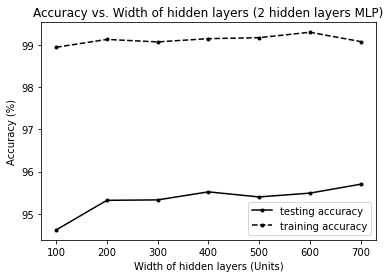

In [34]:
plt.plot([i*100 for i in range(1, 8)], acc_width, marker='.', color='black', label='testing accuracy')
plt.plot([i*100 for i in range(1, 8)], acc_width_train, marker='.', color='black', label='training accuracy', linestyle='dashed')
plt.xlabel('Width of hidden layers (Units)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Width of hidden layers (2 hidden layers MLP)')
plt.legend()
plt.show()

In [35]:
plt.clf()

<Figure size 432x288 with 0 Axes>

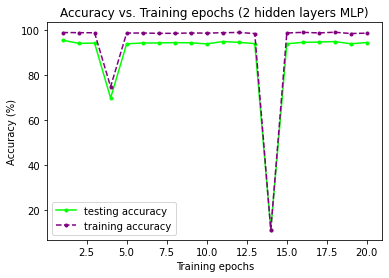

In [36]:
plt.plot([i for i in range(1, 21)], acc_list_width_best, marker='.', color='lime', label='testing accuracy')
plt.plot([i for i in range(1, 21)], acc_list_width_train_best, marker='.', color='purple', label='training accuracy', linestyle='dashed')
plt.xlabel('Training epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training epochs (2 hidden layers MLP)')
plt.legend()
plt.show()

In [37]:
plt.clf()

<Figure size 432x288 with 0 Axes>